### EDA of the waves data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Kuźnica data

In [2]:
df_ku = pd.read_csv('./data/boja-ku-ssum.csv')

In [4]:
df_ku.head()

,UnixTimestamp,Hsig,Tz,Dirp,Tp,Tsea
0,1662972180,1.07,3.960,33.8,6.25,17.00
1,1662973980,1.08,3.960,33.8,5.88,17.05
2,1662975780,1.08,3.960,33.8,5.88,17.10
3,1662977580,1.05,4.000,32.3,5.88,17.20
4,1662979380,0.95,3.846,30.9,5.88,17.30


In [5]:
df_ku.describe()

,UnixTimestamp,Hsig,Tz,Dirp,Tp,Tsea
count,1.576500e+04,15765.000000,15765.000000,15765.000000,15765.000000,15765.000000
mean,1.679705e+09,0.613996,3.453921,190.906832,5.107501,9.659734
std,8.585267e+06,0.534538,0.835031,140.569852,2.126571,6.034516
min,1.662972e+09,0.050000,1.878000,0.000000,1.720000,2.150000
25%,1.672622e+09,0.280000,2.837000,36.600000,3.700000,4.250000
50%,1.679883e+09,0.440000,3.306000,303.800000,5.000000,6.900000
75%,1.687031e+09,0.730000,3.922000,320.600000,6.250000,15.200000
max,1.694355e+09,4.490000,7.143000,358.600000,40.000000,21.600000


Some histograms:

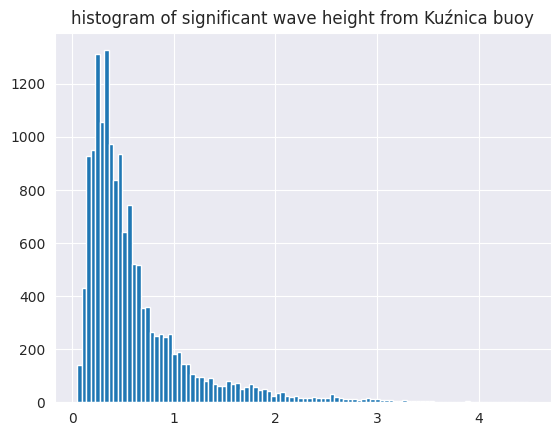

In [11]:
plt.hist(df_ku['Hsig'], bins=100)
plt.title('histogram of significant wave height from Kuźnica buoy')
plt.show()

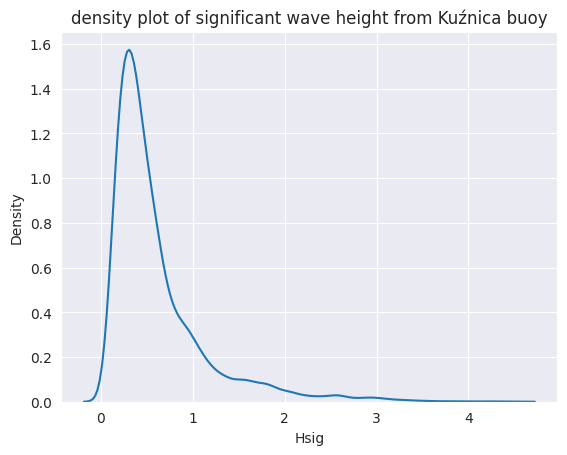

In [10]:
sns.kdeplot(df_ku, x='Hsig')
plt.title('density plot of significant wave height from Kuźnica buoy')
plt.show()

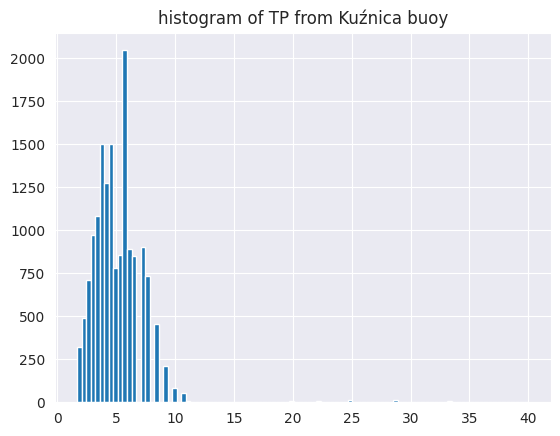

In [13]:
plt.hist(df_ku['Tp'], bins=100)
plt.title('histogram of TP from Kuźnica buoy')
plt.show()

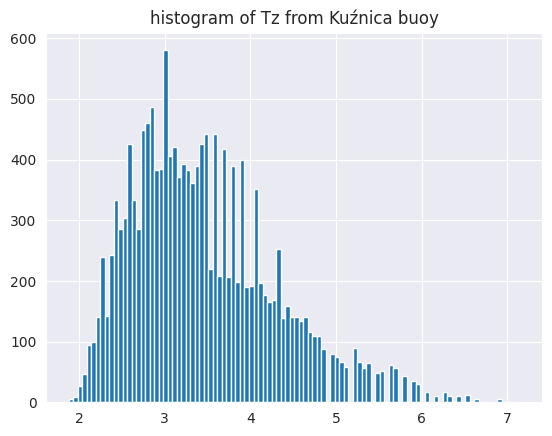

In [14]:
plt.hist(df_ku['Tz'], bins=100)
plt.title('histogram of Tz from Kuźnica buoy')
plt.show()

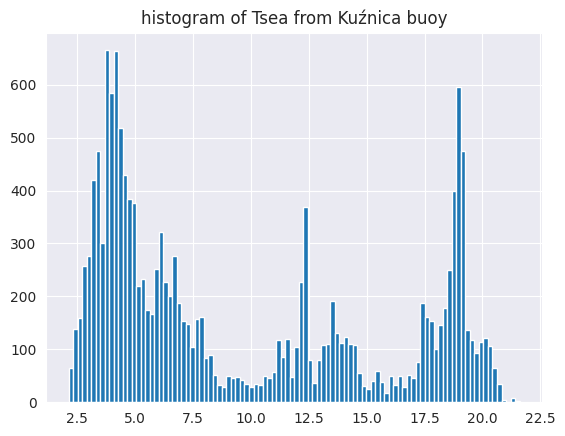

In [15]:
plt.hist(df_ku['Tsea'], bins=100)
plt.title('histogram of Tsea from Kuźnica buoy')
plt.show()

Identifying the longest gaps witout data

In [19]:
df_ku['Date'] = pd.to_datetime(df_ku['UnixTimestamp'], unit='s')

In [20]:
df_ku['time_diffs'] = df_ku['Date'].diff()

In [36]:
df_ku['diffs_minutes'] = df_ku['time_diffs'].dt.total_seconds() / 60

In [37]:
df_ku.sort_values(by='time_diffs', ascending=False)

,UnixTimestamp,Hsig,Tz,Dirp,Tp,Tsea,Date,time_diffs,diffs_minutes
1018,1666620780,0.35,2.469,97.0,3.45,12.15,2022-10-24 14:13:00,12 days 14:30:00,18150.0
109,1663893780,0.38,3.053,25.3,3.85,14.70,2022-09-23 00:43:00,8 days 10:00:00,12120.0
1790,1668708780,0.92,3.279,56.3,4.17,5.60,2022-11-17 18:13:00,8 days 02:30:00,11670.0
10872,1685284980,0.14,2.367,309.4,2.44,12.50,2023-05-28 14:43:00,0 days 03:00:00,180.0
13151,1689522180,0.27,2.581,299.5,3.13,15.25,2023-07-16 15:43:00,0 days 03:00:00,180.0
...,...,...,...,...,...,...,...,...,...
5276,1675077180,1.21,4.211,327.7,8.33,3.90,2023-01-30 11:13:00,0 days 00:30:00,30.0
5277,1675078980,1.29,4.211,331.9,8.33,3.95,2023-01-30 11:43:00,0 days 00:30:00,30.0
5278,1675080780,1.37,4.211,333.3,7.69,3.85,2023-01-30 12:13:00,0 days 00:30:00,30.0
15764,1694355180,0.08,2.581,268.6,2.44,19.20,2023-09-10 14:13:00,0 days 00:30:00,30.0


There are some significant periods with no data from the buoy in the autumn of 2022

In [23]:
print(f" whole dsta period: {df_ku['Date'].min()}, {df_ku['Date'].max()}")

 whole dsta period: 2022-09-12 08:43:00, 2023-09-10 14:13:00


In [25]:
df_ku['time_diffs'].mean()

Timedelta('0 days 00:33:10.801826947')

In [27]:
df1 = df_ku[df_ku['time_diffs'].dt.total_seconds() < 60 * 60 * 24]

In [31]:
df2 = df_ku[df_ku['time_diffs'].dt.total_seconds() < 3600]

In [38]:
df_correct_diff = df_ku[df_ku['diffs_minutes'] == 30.0]

In [42]:
print(f'percentage of records with correct time interval: {(100 * len(df_correct_diff) / len(df_ku)):.2f}%')

percentage of records with correct time interval: 98.67%


#### Jastrzębia Góra data

In [43]:
df_jg = pd.read_csv('./data/boja-jg-ssum.csv')

In [44]:
df_jg.head()

,UnixTimestamp,Hsig,Tz,Dirp,Tp,Tsea
0,1662973560,1.09,4.348,28.1,6.25,8.65
1,1662975360,1.05,4.348,22.5,5.88,8.80
2,1662977160,0.97,4.167,26.7,5.56,9.00
3,1662978960,1.01,4.211,28.1,5.88,9.10
4,1662980760,0.92,4.082,30.9,5.88,9.25


In [46]:
df_jg.describe()

,UnixTimestamp,Hsig,Tz,Dirp,Tp,Tsea
count,1.588200e+04,15882.000000,15882.000000,15882.000000,15882.000000,15882.000000
mean,1.679601e+09,0.726360,3.635127,193.287250,5.000513,9.901454
std,8.568935e+06,0.549463,0.781554,127.061578,1.571354,5.980189
min,1.662974e+09,0.050000,1.990000,0.000000,1.720000,2.550000
25%,1.672557e+09,0.350000,3.077000,53.400000,3.850000,4.450000
50%,1.679707e+09,0.570000,3.540000,281.300000,4.760000,7.850000
75%,1.686888e+09,0.900000,4.082000,293.900000,5.880000,14.387500
max,1.694346e+09,3.960000,7.018000,358.600000,11.110000,21.550000


In [47]:
df_jg['Date'] = pd.to_datetime(df_jg['UnixTimestamp'], unit='s')

In [48]:
df_jg['time_diffs'] = df_jg['Date'].diff()

In [49]:
df_jg['diffs_minutes'] = df_jg['time_diffs'].dt.total_seconds() / 60

In [50]:
df_jg.sort_values(by='time_diffs', ascending=False)

,UnixTimestamp,Hsig,Tz,Dirp,Tp,Tsea,Date,time_diffs,diffs_minutes
1050,1666604160,0.39,2.703,106.9,2.70,12.75,2022-10-24 09:36:00,11 days 18:30:00,16950.0
109,1663893360,0.37,3.279,19.7,4.17,14.50,2022-09-23 00:36:00,8 days 09:30:00,12090.0
1832,1668708360,0.99,3.448,43.6,4.76,6.80,2022-11-17 18:06:00,8 days 02:00:00,11640.0
13655,1690162560,0.46,3.738,278.4,5.26,19.25,2023-07-24 01:36:00,0 days 06:00:00,360.0
11524,1686186360,0.23,2.614,53.4,2.63,16.60,2023-06-08 01:06:00,0 days 05:00:00,300.0
...,...,...,...,...,...,...,...,...,...
5303,1674957960,1.08,4.348,298.1,7.14,4.30,2023-01-29 02:06:00,0 days 00:30:00,30.0
5304,1674959760,1.10,4.396,300.9,7.14,4.30,2023-01-29 02:36:00,0 days 00:30:00,30.0
5305,1674961560,1.09,4.211,299.5,6.67,4.30,2023-01-29 03:06:00,0 days 00:30:00,30.0
15881,1694345760,0.14,2.548,102.7,3.23,19.60,2023-09-10 11:36:00,0 days 00:30:00,30.0


In [51]:
df_ku.sort_values(by='time_diffs', ascending=False)

,UnixTimestamp,Hsig,Tz,Dirp,Tp,Tsea,Date,time_diffs,diffs_minutes
1018,1666620780,0.35,2.469,97.0,3.45,12.15,2022-10-24 14:13:00,12 days 14:30:00,18150.0
109,1663893780,0.38,3.053,25.3,3.85,14.70,2022-09-23 00:43:00,8 days 10:00:00,12120.0
1790,1668708780,0.92,3.279,56.3,4.17,5.60,2022-11-17 18:13:00,8 days 02:30:00,11670.0
10872,1685284980,0.14,2.367,309.4,2.44,12.50,2023-05-28 14:43:00,0 days 03:00:00,180.0
13151,1689522180,0.27,2.581,299.5,3.13,15.25,2023-07-16 15:43:00,0 days 03:00:00,180.0
...,...,...,...,...,...,...,...,...,...
5276,1675077180,1.21,4.211,327.7,8.33,3.90,2023-01-30 11:13:00,0 days 00:30:00,30.0
5277,1675078980,1.29,4.211,331.9,8.33,3.95,2023-01-30 11:43:00,0 days 00:30:00,30.0
5278,1675080780,1.37,4.211,333.3,7.69,3.85,2023-01-30 12:13:00,0 days 00:30:00,30.0
15764,1694355180,0.08,2.581,268.6,2.44,19.20,2023-09-10 14:13:00,0 days 00:30:00,30.0


Unfortunately, the data is not available from either buoys in the same time period.

In [53]:
df_jg_autumn = df_jg[df_jg['Date'] < '2022-12-01 00:00:00']

In [56]:
len(df_jg_autumn[df_jg_autumn['diffs_minutes'] == 30.0]) / len(df_jg_autumn)

0.9979740680713128

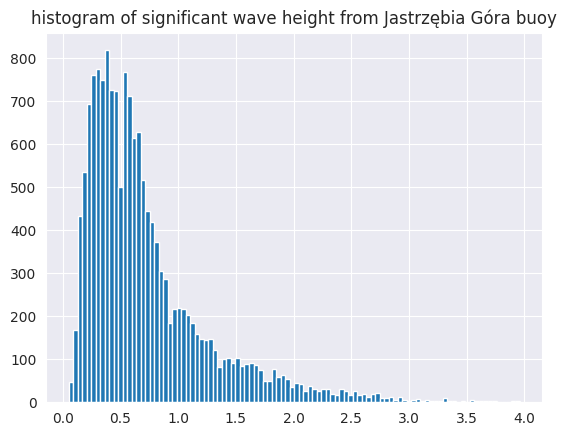

In [57]:
plt.hist(df_jg['Hsig'], bins=100)
plt.title('histogram of significant wave height from Jastrzębia Góra buoy')
plt.show()

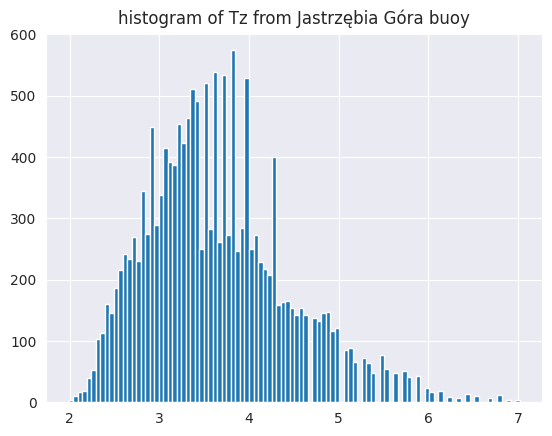

In [60]:
plt.hist(df_jg['Tz'], bins=100)
plt.title('histogram of Tz from Jastrzębia Góra buoy')
plt.show()

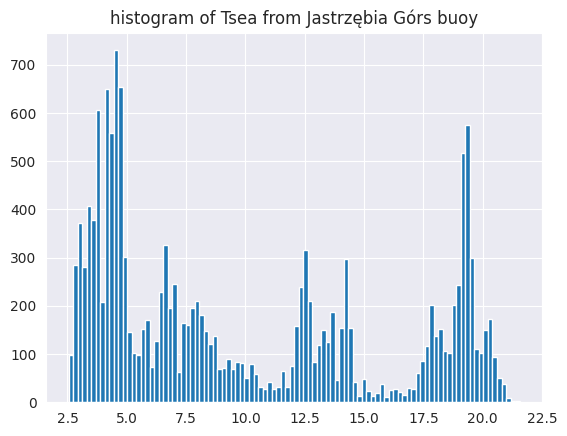

In [59]:
plt.hist(df_jg['Tsea'], bins=100)
plt.title('histogram of Tsea from Jastrzębia Górs buoy')
plt.show()

Volatility of the features

In [68]:
df_ku.set_index('Date', inplace=True)
df_jg.set_index('Date', inplace=True)

In [78]:
def plot_volatility(df_ku: pd.DataFrame, df_jg: pd.DataFrame, column: str) -> None:
    df_jg1 = df_jg.copy()
    df_ku1 = df_ku.copy()
    df_ku1[f'{column}_vol'] = df_ku[column].rolling('3h').std()
    df_jg1[f'{column}_vol'] = df_jg[column].rolling('3h').std()
    sns.lineplot(df_ku1, x='Date', y=f'{column}_vol', label='Kuźnica')
    sns.lineplot(df_jg1, x='Date', y=f'{column}_vol', label='Jastrzębia Góra')
    plt.title(f'A comparison of the volatility of {column} from both towns')
    plt.legend()
    plt.xticks(rotation=45)
    plt.show()

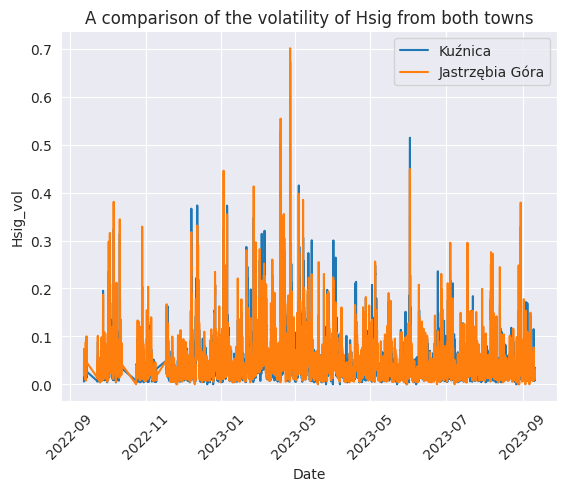

In [79]:
plot_volatility(df_ku, df_jg, column='Hsig')

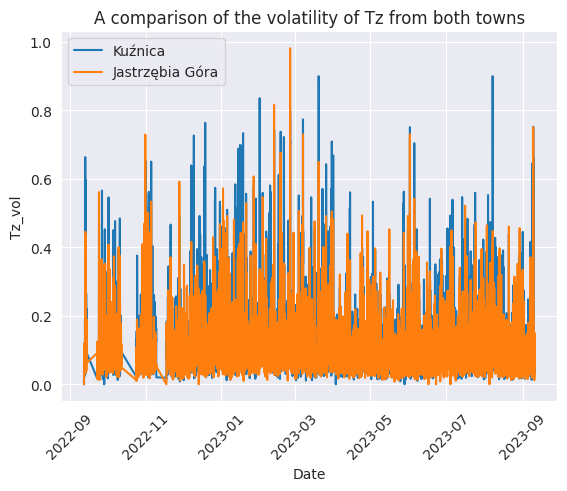

In [80]:
plot_volatility(df_ku, df_jg, column='Tz')

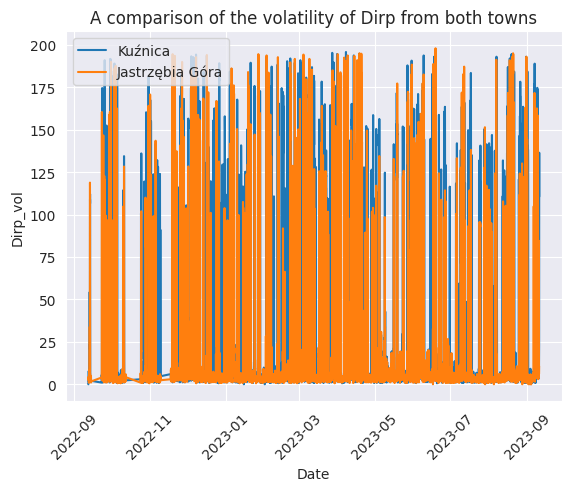

In [81]:
plot_volatility(df_ku, df_jg, column='Dirp')

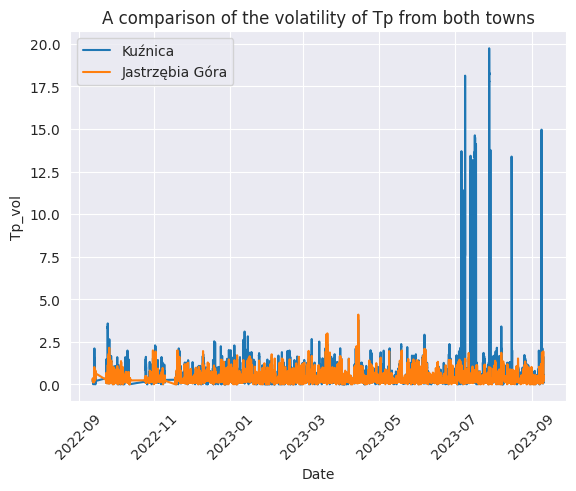

In [83]:
plot_volatility(df_ku, df_jg, column='Tp')

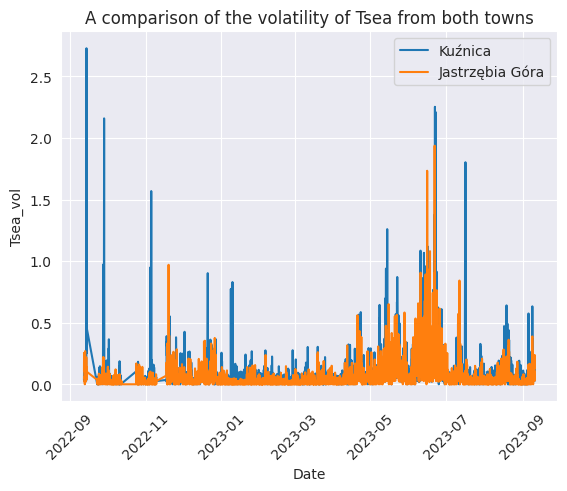

In [86]:
plot_volatility(df_ku, df_jg, column='Tsea')

It seems that the period of the highest volatility varies between specific variables. Nevertheless, all seasons seem important, as at least one variable is highly volatile in each of them. The most important periods are winter (from January to March), because of the highst volatility of significant wave heights and late spring / early summer (from May to July), because of significantly higher volatility of Tsea and Tp variables. Generally, Kuźnica buoy contains more volatile data.

In [85]:
df_ku

,UnixTimestamp,Hsig,Tz,Dirp,Tp,Tsea,time_diffs,diffs_minutes,Hsig_vol,Tz_vol,Dirp_vol
Date,,,,,,,,,,,
2022-09-12 08:43:00,1662972180,1.07,3.960,33.8,6.25,17.00,NaT,NaN,NaN,NaN,NaN
2022-09-12 09:13:00,1662973980,1.08,3.960,33.8,5.88,17.05,0 days 00:30:00,30.0,0.007071,0.000000,0.000000
2022-09-12 09:43:00,1662975780,1.08,3.960,33.8,5.88,17.10,0 days 00:30:00,30.0,0.005774,0.000000,0.000000
2022-09-12 10:13:00,1662977580,1.05,4.000,32.3,5.88,17.20,0 days 00:30:00,30.0,0.014142,0.020000,0.750000
2022-09-12 10:43:00,1662979380,0.95,3.846,30.9,5.88,17.30,0 days 00:30:00,30.0,0.055045,0.058096,1.302690
...,...,...,...,...,...,...,...,...,...,...,...
2023-09-10 12:13:00,1694347980,0.09,2.454,341.7,5.56,19.25,0 days 00:30:00,30.0,0.015000,0.076991,130.985305
2023-09-10 12:43:00,1694349780,0.08,2.286,120.9,2.70,19.25,0 days 00:30:00,30.0,0.017889,0.071107,114.098918
2023-09-10 13:13:00,1694351580,0.08,2.353,340.3,5.56,19.30,0 days 00:30:00,30.0,0.018348,0.064278,130.045925
